In [129]:
from HelperFunctions import *
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [130]:
results = pickle.load(open('SPOresultsFull.pkl','rb')).unstack().stack(0).droplevel(['p','grid_dim'])

In [131]:
results['SPO diff'] = (results['SPO_loss_SGD'] - results['SPO_loss_direct'])/results['SPO_loss_direct']
results['SPO+ diff'] = (results['SPO_plus_loss_SGD'] - results['SPO_plus_loss_direct'])/results['SPO_plus_loss_direct']

In [132]:
lossdiffs = results[['SPO diff','SPO+ diff']]

In [133]:
lossmeans = lossdiffs.groupby('n').mean()
lossSD = lossdiffs.groupby('n').std()
lossLB = lossmeans - 1.96*lossSD/np.sqrt(30) #95% confidence interval for the mean
lossUB = lossmeans + 1.96*lossSD/np.sqrt(30) #95% confidence interval for the mean

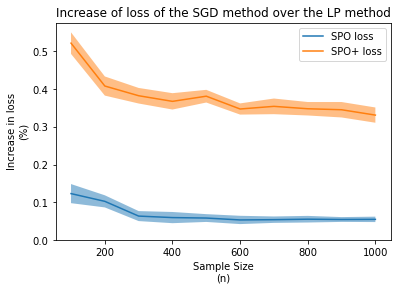

In [134]:
plt.plot(lossmeans.index,lossmeans['SPO diff'], label='SPO loss')
plt.fill_between(lossmeans.index,lossLB['SPO diff'],lossUB['SPO diff'], alpha=0.5)

plt.plot(lossmeans.index,lossmeans['SPO+ diff'], label='SPO+ loss')
plt.fill_between(lossmeans.index,lossLB['SPO+ diff'],lossUB['SPO+ diff'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Increase in loss\n(%)')
plt.title('Increase of loss of the SGD method over the LP method')
plt.show()

In [135]:
(lossdiffs<0).groupby('n').sum()

metric,SPO diff,SPO+ diff
n,,
100,2,0
200,0,0
300,1,0
400,0,0
500,1,0
600,0,0
700,0,0
800,0,0
900,0,0


In [136]:
runtimes = results[['direct_runtime','SGD_runtime']]

In [137]:
runtimemeans = runtimes.groupby('n').mean()
runtimeSD = runtimes.groupby('n').std()
runtimeUB=runtimes.groupby('n').quantile(0.975)
runtimeLB=runtimes.groupby('n').quantile(0.025)
#runtimeLB = runtimemeans - 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean
#runtimeUB = runtimemeans + 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean

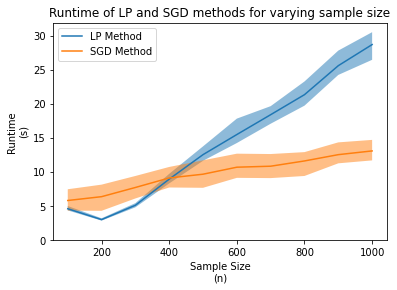

In [138]:
plt.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
plt.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

plt.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
plt.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Runtime\n(s)')
plt.title('Runtime of LP and SGD methods for varying sample size')
plt.show()

In [139]:
runtimemeans

metric,direct_runtime,SGD_runtime
n,,
100,4.615217,5.825824
200,3.023268,6.387562
300,5.127132,7.736858
400,8.963309,9.134901
500,12.556814,9.684961
600,15.507036,10.711860
700,18.417378,10.857947
800,21.356275,11.629443
900,25.609799,12.553735
